# Case study on Unsupervised Learning

Do the following in the wine dataset.

1.Read the dataset to the python environment.

2.Try out different clustering models in the wine dataset.

3.Find the optimum number of clusters in each model and create the model with the optimum number of clusters.

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1.Read the dataset to the python environment.

In [2]:
data = pd.read_csv(r"C:\Users\ASUS\Downloads\Wine.csv")

In [3]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


# Data analysis

In [4]:
data.shape

(178, 13)

there are 178 rows and 13 columns in the dataset

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [6]:
data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [7]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [8]:
%whos

Variable   Type         Data/Info
---------------------------------
data       DataFrame         Alcohol  Malic_Acid <...>\n[178 rows x 13 columns]
np         module       <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
pd         module       <module 'pandas' from 'C:<...>es\\pandas\\__init__.py'>
plt        module       <module 'matplotlib.pyplo<...>\\matplotlib\\pyplot.py'>
sns        module       <module 'seaborn' from 'C<...>s\\seaborn\\__init__.py'>


# preprocessing

In [10]:
#check missing values
data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

they are no missing values in the dataset

In [13]:
#standard scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data=scaler.fit_transform(data)
data=pd.DataFrame(data)
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,-8.619821e-16,-8.357859e-17,-8.657245e-16,-1.160121e-16,-1.995907e-17,-2.972030e-16,-4.016762e-16,4.079134e-16,-1.699639e-16,-1.122697e-17,3.717376e-16,2.919013e-16,-7.484650e-18
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246e+00,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-8.854682e-01,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,9.595986e-02,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,8.089974e-01,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515e+00,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


In [15]:
#Normalization
from sklearn.preprocessing import Normalizer
norm=Normalizer()
data=norm.fit_transform(data)

# try out different clustering models in the wine dataset.

In [16]:
#PCA
from sklearn.decomposition import PCA
pca=PCA(n_components=2,random_state=42)
pca.fit(data)
x_pca=pca.transform(data)
x_pca.shape

(178, 2)

In [17]:
pca.components_

array([[-0.19995859,  0.21483516, -0.03583603,  0.25059171, -0.14075692,
        -0.3942839 , -0.42049708,  0.30897799, -0.28884683,  0.03864312,
        -0.27036096, -0.36902382, -0.32867169],
       [-0.46787446, -0.25944656, -0.29903119,  0.03119847, -0.32430417,
        -0.01269628,  0.06357344, -0.05800528,  0.0194043 , -0.50757364,
         0.26661597,  0.22664747, -0.36081395]])

In [18]:
#K-Means clustering
from sklearn.cluster import KMeans
model_kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42)
model_kmeans.fit(x_pca)
lables=model_kmeans.predict(x_pca)
print(lables)

[3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 1 1 1 3 1 3 3 3 3 3 3 3 3 3
 3 1 3 3 1 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 4 4 2 1 2 1 1 2 4 1 4 1 4 1
 1 2 2 4 1 1 2 1 2 0 1 2 2 2 4 2 4 4 4 2 2 1 4 2 1 1 2 2 2 2 2 4 2 4 2 1 1
 2 4 2 2 2 2 2 4 2 2 1 4 4 1 2 2 4 2 4 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


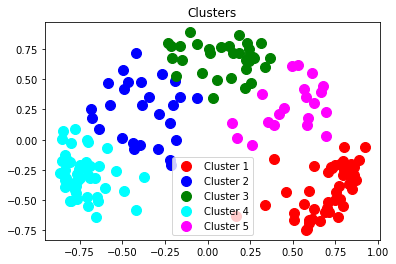

In [19]:
plt.scatter(x_pca[lables==0,0], x_pca[lables==0,1], s=100, c='red', label= 'Cluster 1')
plt.scatter(x_pca[lables==1,0], x_pca[lables==1,1], s=100, c='blue', label= 'Cluster 2')
plt.scatter(x_pca[lables==2,0], x_pca[lables==2,1], s=100, c='green', label= 'Cluster 3')
plt.scatter(x_pca[lables==3,0], x_pca[lables==3,1], s=100, c='cyan', label= 'Cluster 4')
plt.scatter(x_pca[lables==4,0], x_pca[lables==4,1], s=100, c='magenta', label= 'Cluster 5')
plt.title('Clusters')
plt.legend()
plt.show()

In [20]:
#Agglomerative Hierarchical clustering
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=5,affinity="euclidean",linkage="ward")
lables1=cluster.fit_predict(x_pca)
lables1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 1, 4, 3, 4, 3,
       3, 4, 1, 3, 1, 3, 4, 0, 3, 4, 4, 1, 3, 4, 3, 3, 4, 2, 3, 3, 4, 4,
       1, 4, 1, 1, 1, 3, 3, 0, 1, 3, 3, 3, 3, 4, 4, 4, 3, 1, 4, 1, 4, 3,
       3, 4, 1, 4, 4, 4, 4, 4, 1, 4, 3, 0, 1, 1, 3, 4, 4, 1, 4, 1, 1, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int64)

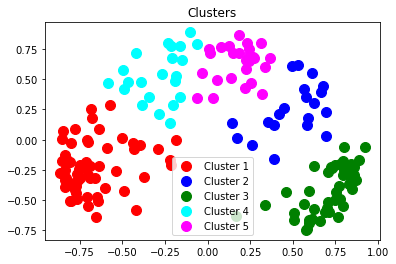

In [21]:
plt.scatter(x_pca[lables1==0,0], x_pca[lables1==0,1], s=100, c='red', label= 'Cluster 1')
plt.scatter(x_pca[lables1==1,0], x_pca[lables1==1,1], s=100, c='blue', label= 'Cluster 2')
plt.scatter(x_pca[lables1==2,0], x_pca[lables1==2,1], s=100, c='green', label= 'Cluster 3')
plt.scatter(x_pca[lables1==3,0], x_pca[lables1==3,1], s=100, c='cyan', label= 'Cluster 4')
plt.scatter(x_pca[lables1==4,0], x_pca[lables1==4,1], s=100, c='magenta', label= 'Cluster 5')
plt.title('Clusters')
plt.legend()
plt.show()

# Find the optimum number of clusters in each model and create the model with the optimum number of clusters.

In [23]:
#PCA
pca1 = PCA(n_components = 0.95)
pca1.fit(data)
x_pca1 = pca1.transform(data)

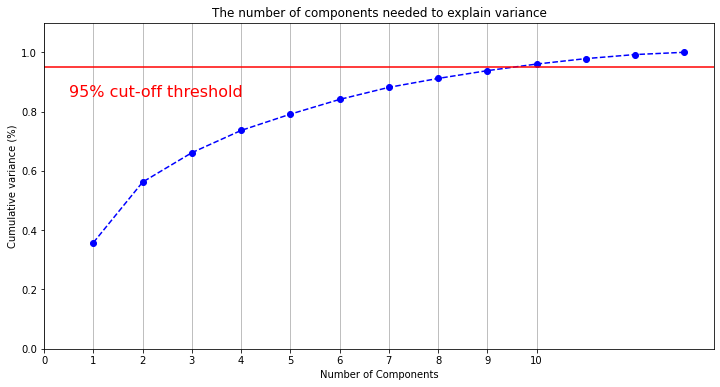

In [25]:
pca = PCA().fit(data)

plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 14, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 11, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

from the above grap we can understand the no of components is 10

In [27]:
# kmeans
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(x_pca1)
  wcss.append(kmeans.inertia_)
  print(kmeans.inertia_)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


170.61006583601727
117.9508337183585
87.7469234476799
80.04631327294675
73.8362222597813
70.3949420809564
66.37894248698122
62.789598417757425
60.15441286502869
57.97620527920662


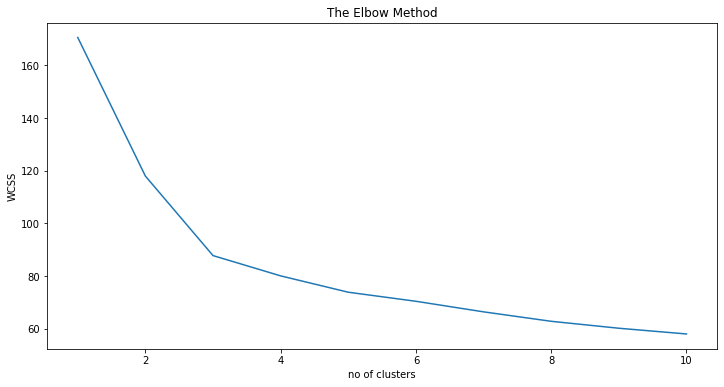

In [28]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('WCSS')
plt.show()

In [29]:
from sklearn.metrics import silhouette_score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=1000)
    kmeans.fit(x_pca1)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(x_pca1, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.28269410001477524
For n_clusters=3, the silhouette score is 0.31514227927517624
For n_clusters=4, the silhouette score is 0.280707430919541
For n_clusters=5, the silhouette score is 0.24016547763426077
For n_clusters=6, the silhouette score is 0.2170099305390355
For n_clusters=7, the silhouette score is 0.16570174707558386
For n_clusters=8, the silhouette score is 0.17653683379939658


the optimum no of clusters is are 3

In [30]:
model_kmeans=KMeans(n_clusters=3)
model_kmeans.fit(x_pca1)
lables2=model_kmeans.predict(x_pca1)
print(lables2)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 2 0 2 0 0 1
 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


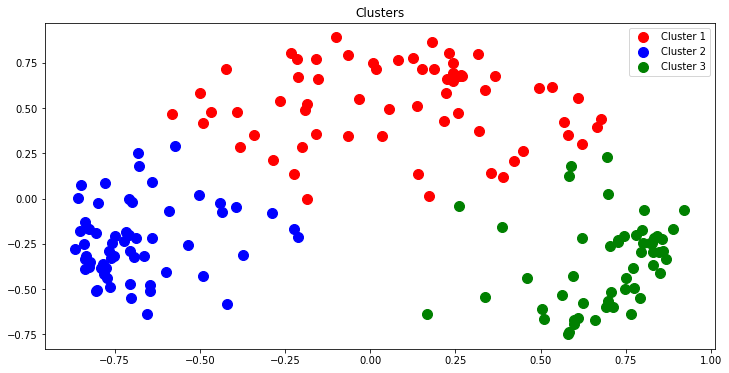

In [31]:
plt.scatter(x_pca1[lables2==0,0], x_pca1[lables2==0,1], s=100, c='red', label= 'Cluster 1')
plt.scatter(x_pca1[lables2==1,0], x_pca1[lables2==1,1], s=100, c='blue', label= 'Cluster 2')
plt.scatter(x_pca1[lables2==2,0], x_pca1[lables2==2,1], s=100, c='green', label= 'Cluster 3')
plt.title('Clusters')
plt.legend()
plt.show()

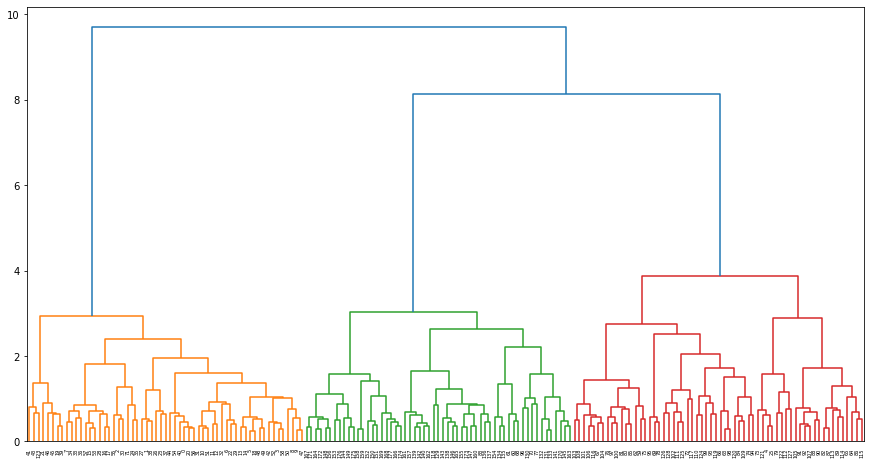

In [32]:
#Agglomerative Hierarchical analysis
from scipy.cluster.hierarchy import dendrogram,linkage
linked=linkage(x_pca1,method="ward")
plt.figure(figsize=(15,8))
dendrogram(linked,orientation="top",distance_sort="ascending",show_leaf_counts=True)
plt.show()

from the above we can understand that the optimum no of clusters are 3

In [33]:
cluster=AgglomerativeClustering(n_clusters=3,affinity="euclidean",linkage="ward")
lables3=cluster.fit_predict(x_pca1)
lables3

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 2, 0, 2, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int64)

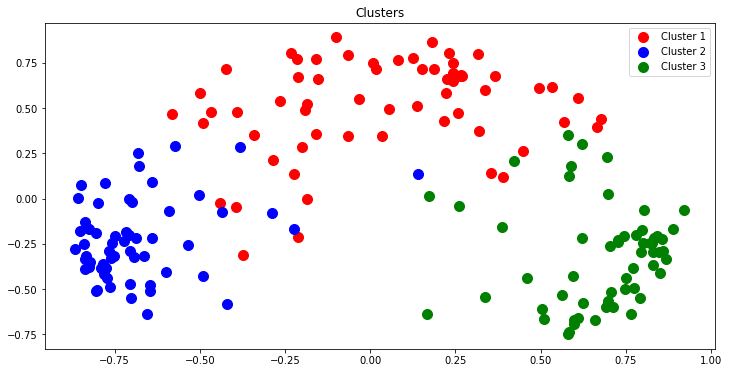

In [34]:
plt.scatter(x_pca1[lables3==0,0], x_pca1[lables3==0,1], s=100, c='red', label= 'Cluster 1')
plt.scatter(x_pca1[lables3==1,0], x_pca1[lables3==1,1], s=100, c='blue', label= 'Cluster 2')
plt.scatter(x_pca1[lables3==2,0], x_pca1[lables3==2,1], s=100, c='green', label= 'Cluster 3')
plt.title('Clusters')
plt.legend()
plt.show()

From the above, we can understand that the number of clusters are changed after computing optimum number of clusters in case of k_means and agglomerative clustering